In [51]:
%run load_data.ipynb
print (dir())

{0: 3356849, 1: 47, 2: 159, 4: 885653, 67108864: 93686, 134217728: 28959}
{0: 4290039, 1: 45, 2: 349, 4: 1627, 67108864: 16092, 134217728: 29906}
0
1
10
100
100000000000000000000000000
1000000000000000000000000000
['DataFrame', 'GOLD_INDEX', 'G_INDEX', 'In', 'Math', 'NPIX', 'NSIDE', 'Out', 'SIZE_RATIO_CUT', 'SNR_CUT', 'Series', 'T_CUT', 'Table', '_', '_14', '_15', '_17', '_18', '_19', '_42', '_43', '_44', '_45', '_46', '_47', '_48', '_49', '_50', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i42', '_i43', '_i44', '_i45', '_i46', '_i47', '_i48', '_i49', '_i5', '_i50', '_i51', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 

In [52]:
import healpy as hp
import astropy_healpix as a_hp
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Choose NSIDE

In [53]:
NSIDE=256 #or 512
NPIX=hp.nside2npix(NSIDE)
print ("The number of pixels is: {}.".format(NPIX))
G_INDEX=np.arange(NPIX)

The number of pixels is: 786432.


In [54]:
final_df_list=[None]*4
for i,catalog in enumerate(mcal_df_list_positive):
    final_df_list[i]=pd.concat([catalog,photdf[['true_cm_g_1','true_cm_g_2']]],axis=1,join='inner')

In [55]:
def get_healpix(df):
    print ("The length of the df is: {}.".format(len(df)))
    print ("The ratio of the length of the catagory to the total pixel number is: {:.2%}".format(len(df)/NPIX))
    df['ipix']=df.apply(lambda x:hp.ang2pix(NSIDE,np.pi/2-np.deg2rad(x['dec']),np.deg2rad(x['ra']),nest=True),axis=1)
    print("The propotion of rendered objects is: {:.2%}".format(np.sum(df['ipix']!=0)/len(df)))
    print ("Resetting indexes")
    df_ipix=df.set_index('ipix')
    df_ipix_sorted=df_ipix.sort_index()
    return (df_ipix_sorted)

def group_ipix(df_ipix_sorted):
    number_mask=df_ipix_sorted.groupby('ipix').count()['R11']<10
    df_sorted_grouped=df_ipix_sorted.groupby('ipix').mean()
    df_sorted_grouped_masked=df_sorted_grouped[number_mask]
    print ("The mean of R11 is {}, max is {}, min is {}".format(df_sorted_grouped_masked['R11'].mean(),df_sorted_grouped_masked['R11'].max(),df_sorted_grouped_masked['R11'].min()))
    print ("The mean of R22 is {}, max is {}, min is {}".format(df_sorted_grouped_masked['R22'].mean(),df_sorted_grouped_masked['R22'].max(),df_sorted_grouped_masked['R22'].min()))
    R11 = df_sorted_grouped_masked['R11'].mean()
    R22 = df_sorted_grouped_masked['R22'].mean()
    df_sorted_grouped_masked['calculated_g_1']=df_sorted_grouped_masked.apply(lambda x:x['e_1']/R11,axis=1)
    df_sorted_grouped_masked['calculated_g_2']=df_sorted_grouped_masked.apply(lambda x:x['e_2']/R22,axis=1)
    df_sorted_grouped_masked['delta_g1']=df_sorted_grouped_masked.apply(lambda x:x['calculated_g_1']-x['true_cm_g_1'],axis=1)
    df_sorted_grouped_masked['delta_g2']=df_sorted_grouped_masked.apply(lambda x:x['calculated_g_2']-x['true_cm_g_2'],axis=1)
#     print ("The propotion of averaged objects is: {:.2%}".format((len(df_ipix_sorted)-len(df_sorted_grouped_masked))/len(df_ipix_sorted)))
    print ("---------------------------------")
    return (df_sorted_grouped_masked)

In [56]:
ipix_sorted = [get_healpix(df) for df in final_df_list]

The length of the df is: 272818.
The ratio of the length of the catagory to the total pixel number is: 34.69%
The propotion of rendered objects is: 100.00%
Resetting indexes
The length of the df is: 272818.
The ratio of the length of the catagory to the total pixel number is: 34.69%
The propotion of rendered objects is: 100.00%
Resetting indexes
The length of the df is: 215145.
The ratio of the length of the catagory to the total pixel number is: 27.36%
The propotion of rendered objects is: 100.00%
Resetting indexes
The length of the df is: 215145.
The ratio of the length of the catagory to the total pixel number is: 27.36%
The propotion of rendered objects is: 100.00%
Resetting indexes


In [57]:
ipix_sorted_filtered_grouped=[group_ipix(df) for df in ipix_sorted]

The mean of R11 is 0.78644835142623, max is 13.67369349540634, min is -6.992034474310287
The mean of R22 is 0.7855622549926757, max is 10.63652140008755, min is -12.231064460480107


/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

---------------------------------
The mean of R11 is 0.7750157162403251, max is 17.03993360179426, min is -6.842691657484413
The mean of R22 is 0.7847042804545312, max is 21.176713510351416, min is -32.04549961794578
---------------------------------
The mean of R11 is 0.8033524948405488, max is 23.548710983418214, min is -28.97834777796125
The mean of R22 is 0.7952090302924671, max is 36.132887083895895, min is -24.31547881220993
---------------------------------
The mean of R11 is 0.7722151369321218, max is 7.48179347176924, min is -26.84834620190807
The mean of R22 is 0.81033143757935, max is 17.67501272412899, min is -10.426019279742748
---------------------------------


In [58]:
def fill_for_plot(df,key_array):
    df_filled=df[key_array].reindex(index=G_INDEX,fill_value=np.nan)
    print("The propotion of filled pixels is: {}.".format(np.sum(df_filled['delta_g1']>0)/NPIX))
    return(df_filled)

In [59]:
hp_filled_list=[fill_for_plot(df,['delta_g1','delta_g2']) for df in ipix_sorted_filtered_grouped]

The propotion of filled pixels is: 0.002887725830078125.
The propotion of filled pixels is: 0.0029856363932291665.
The propotion of filled pixels is: 0.003414154052734375.
The propotion of filled pixels is: 0.003734588623046875.


In [60]:
fig1,(ax1,ax2)=plt.subplots(ncols=2)

plt.axes(ax1)
hp.mollview(hp_filled_list[0]['delta_g1'].to_numpy(),nest=True,title="$\delta g_1$ for riz /w MOF",hold=True)
hp.graticule()

plt.axes(ax2)
hp.mollview(hp_filled_list[1]['delta_g1'].to_numpy(),nest=True,title="$\delta g_1$ for riz /wo MOF",hold=True)
hp.graticule()



plt.title('HEALPix comparison')

plt.savefig('/home/cz136/project/balrog/image/hp/sample_delta_g1.png',dpi=2048)
plt.close()

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


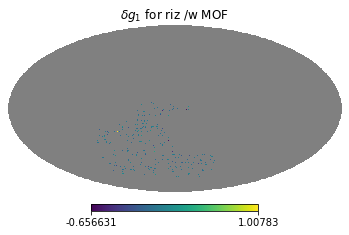

In [107]:
fig = plt.figure();
ax = fig.add_subplot(111)

plt.axes(ax)
hp.mollview(hp_filled_list[0]['delta_g1'].to_numpy(),nest=True,title="$\delta g_1$ for riz /w MOF",hold=True)

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

plt.axes(ax1)
hp.mollview(np.random.random(hp.nside2npix(32)), hold=True)

plt.axes(ax2)
hp.mollview(np.arange(hp.nside2npix(32)), hold=True)

plt.close()

# Compare maps

In [62]:
maps=h5py.File('/home/cz136/project/balrog/data/Y3_GOLD_2_2_1_maps.h5','r')['maps'] #no neighbor

In [63]:
gold=h5py.File('/home/cz136/project/balrog/data/Y3_GOLD_2_2_1_maps.h5','r')

In [64]:
list(gold.keys())

['maps']

In [65]:
list(gold['maps'].keys())

['det_frac',
 'ebv_planck13',
 'g',
 'hpix',
 'i',
 'r',
 'star_density_piffv23',
 'z']

In [66]:
# ['det_frac', Effective coverage fraction of each pixel(normalized to 1)
#  'ebv_planck13', E(B-V)
#  'g',
#  'hpix',
#  'i',
#  'r',
#  'star_density_piffv23', star density
#  'z']

In [67]:
gold['maps']['det_frac'][:].max()

1.0

In [68]:
gold['maps']['det_frac'][:].max()

1.0

In [69]:
maps['g']['sigma_zp'][:][maps['g']['sigma_zp'][:]>0][0:50]

array([1.093e-02, 9.793e-03, 1.010e-02, 1.119e-02, 1.057e-02, 1.124e-02,
       1.124e-02, 1.124e-02, 1.124e-02, 1.124e-02, 1.124e-02, 1.124e-02,
       1.124e-02, 1.124e-02, 1.124e-02, 1.108e-02, 1.124e-02, 1.124e-02,
       1.124e-02, 1.108e-02, 1.108e-02, 8.727e-03, 8.727e-03, 8.265e-03,
       1.108e-02, 8.727e-03, 8.727e-03, 8.265e-03, 8.265e-03, 1.072e-02,
       1.072e-02, 1.123e-02, 1.124e-02, 1.124e-02, 1.124e-02, 1.108e-02,
       1.108e-02, 8.727e-03, 8.727e-03, 8.265e-03, 1.108e-02, 8.727e-03,
       8.793e-03, 8.265e-03, 8.265e-03, 1.072e-02, 1.072e-02, 1.123e-02,
       8.265e-03, 1.072e-02])

In [70]:
# ['airmass', airmass 
#  'fwhm', fwhm of psf
#  'mof_depth', no of coadd images
#  'sigma_zp', 
#  'sky_var',
#  'teff_mean', 
#  'teff_sum']

In [71]:
list(maps['g'].keys())
for key in maps['g'].keys():
    print (key,len(maps['g'][key]))

airmass 25169981
fwhm 25169981
mof_depth 25169981
sigma_zp 25169981
sky_var 25169981
teff_mean 25169981
teff_sum 25169981


In [72]:
for key in maps.keys():
    print ("{:20} has {} objects".format(key,len(maps[key])))

det_frac             has 25169981 objects
ebv_planck13         has 25169981 objects
g                    has 7 objects
hpix                 has 25169981 objects
i                    has 7 objects
r                    has 7 objects
star_density_piffv23 has 25169981 objects
z                    has 7 objects


In [73]:
ipix_maps={}
GOLD_INDEX=np.arange(hp.nside2npix(4096))
for key in ['ebv_planck13','star_density_piffv23','det_frac']:
    hpix=np.full(hp.nside2npix(4096),np.nan)
    hpix[maps['hpix']]=maps[key]
    ipix_maps[key]=np.array(hpix)

In [74]:
gold_df=pd.DataFrame(data=ipix_maps,index=GOLD_INDEX)

In [75]:
gold_df[gold_df==hp.UNSEEN]=np.nan

In [76]:
band_columns=pd.MultiIndex.from_product([['g','r','i','z'],
                                       ['airmass','fwhm','mof_depth','sigma_zp','sky_var','teff_mean','teff_sum']],
                                     names=['band','data'])

In [77]:
gold_df_band=pd.DataFrame(index=G_INDEX,columns=band_columns) 

In [78]:
def get_df_band():
    band_maps={'g':{},'r':{},'i':{},'z':{}}
    for band in ['g','r','i','z']:
        for key in maps['r'].keys():
            downgraded=[]
            hpix=np.full(hp.nside2npix(4096),np.nan)
            hpix[maps['hpix']]=maps[band][key]
            print(hpix)
            downgraded=hp.pixelfunc.ud_grade(hpix, NSIDE, order_in='NESTED', order_out='NESTED',pess=False)
            print(key,downgraded)
            band_maps[band][key]=downgraded
            gold_df_band.loc[:,(band,key)]=downgraded
    return (gold_df_band)

In [79]:
gold_df_band=get_df_band()

[1.248e+00 1.215e+00 1.224e+00 ... nan nan nan]
airmass [nan nan nan ... -1.637e+30 -1.637e+30 -1.637e+30]
[8.339e-01 8.322e-01 8.326e-01 ... nan nan nan]
fwhm [nan nan nan ... -1.637e+30 -1.637e+30 -1.637e+30]
[2.224e+01 2.214e+01 2.219e+01 ... nan nan nan]
mof_depth [nan nan nan ... -1.637e+30 -1.637e+30 -1.637e+30]
[1.093e-02 9.793e-03 1.010e-02 ... nan nan nan]
sigma_zp [nan nan nan ... -1.637e+30 -1.637e+30 -1.637e+30]
[4.508e+03 4.514e+03 4.513e+03 ... nan nan nan]
sky_var [nan nan nan ... -1.637e+30 -1.637e+30 -1.637e+30]
[7.044e-01 7.101e-01 7.086e-01 ... nan nan nan]
teff_mean [nan nan nan ... -1.637e+30 -1.637e+30 -1.637e+30]
[1.206e+02 9.944e+01 1.052e+02 ... nan nan nan]
teff_sum [nan nan nan ... -1.637e+30 -1.637e+30 -1.637e+30]
[1.248e+00 1.215e+00 1.224e+00 ... nan nan nan]
airmass [nan nan nan ... -1.637e+30 -1.637e+30 -1.637e+30]
[8.339e-01 8.322e-01 8.326e-01 ... nan nan nan]
fwhm [nan nan nan ... -1.637e+30 -1.637e+30 -1.637e+30]
[2.224e+01 2.214e+01 2.219e+01 ... na

In [80]:
gold_df_band[gold_df_band==hp.UNSEEN]=np.nan

In [81]:
# gold_df_band={}
# for band in ['g','r','i','z']:
#     sub_df=pd.DataFrame()
#     for key in maps['r'].keys():
#         hpix=np.full(hp.nside2npix(4096),np.nan)
#         hpix[maps['hpix']]=maps[band][key]
#         downgraded_array=hp.pixelfunc.ud_grade(np.array(hpix), NSIDE, order_in='NESTED', order_out='NESTED',pess=True)
#         sub_df.assign(key,downgraded_array)
#     pd.concat(gold_df_band,axis=1)


# Show star density map

In [82]:
fig=plt.figure()
hp.mollview(gold_df['star_density_piffv23'].to_numpy(),nest=True,title="Star density of full DES footprint")
hp.graticule()
plt.savefig('/home/cz136/project/balrog/image/hp/star_density.png',dpi=1024)
plt.close()

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<Figure size 432x288 with 0 Axes>

# Downgrade map

In [83]:
downgraded_maps={}
for key,value in ipix_maps.items():
    downgraded_maps[key]=hp.pixelfunc.ud_grade(value, NSIDE, order_in='NESTED', order_out='NESTED',pess=False)

In [84]:
gold_df_downgraded=pd.DataFrame(data=downgraded_maps,index=G_INDEX)

In [85]:
gold_df_all=pd.concat([gold_df_downgraded,gold_df_band],axis=1,join='inner')

In [86]:
gold_df_all[gold_df_all==hp.UNSEEN]=np.nan

In [87]:
gold_df_all.to_pickle('/home/cz136/project/balrog/data/gold_g/gold.pkl')

In [88]:
gold_join_delta_g_list=[None]*4
for i,catalog in enumerate(ipix_sorted_filtered_grouped):
        gold_join_delta_g_list[i]=pd.concat([catalog,gold_df_all],axis=1,join='inner')
        gold_join_delta_g_list[i].index.name="ipix"

In [89]:
gng_filled_list=[fill_for_plot(df,['delta_g1','delta_g2']) for df in gold_join_delta_g_list]

The propotion of filled pixels is: 0.002887725830078125.
The propotion of filled pixels is: 0.0029856363932291665.
The propotion of filled pixels is: 0.003414154052734375.
The propotion of filled pixels is: 0.003734588623046875.


In [90]:
gold_n_delta_g_list=[None]*4
for i,df in enumerate(gng_filled_list):
    gold_n_delta_g_list[i]=pd.concat([gold_df_all,df],axis=1)
    gold_n_delta_g_list[i][gold_n_delta_g_list[1]==hp.UNSEEN]=np.nan

In [91]:
corr_list=[None]*4
for i,df in enumerate(gold_n_delta_g_list):
    print(len(df))
    corr_list[i]=df.corr(method='pearson').loc[:,['delta_g1','delta_g2']]

786432
786432
786432
786432


In [92]:
gold_n_delta_g_list[1]

,ebv_planck13,star_density_piffv23,det_frac,"(g, airmass)","(g, fwhm)","(g, mof_depth)","(g, sigma_zp)","(g, sky_var)","(g, teff_mean)","(g, teff_sum)",...,"(i, teff_sum)","(z, airmass)","(z, fwhm)","(z, mof_depth)","(z, sigma_zp)","(z, sky_var)","(z, teff_mean)","(z, teff_sum)",delta_g1,delta_g2
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786427,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
786428,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
786429,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
786430,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Correlations (only positive g)

# mcal2: riz w MOF

In [93]:
corr_list[0].describe()

,delta_g1,delta_g2
count,3.300e+01,3.300e+01
mean,3.458e-02,3.185e-02
std,1.752e-01,1.764e-01
min,-1.341e-02,-3.096e-02
25%,-4.772e-03,-1.804e-02
50%,1.134e-03,8.335e-03
75%,8.867e-03,1.209e-02
max,1.000e+00,1.000e+00


In [94]:
corr_list[0]

,delta_g1,delta_g2
ebv_planck13,3.347e-03,1.454e-02
star_density_piffv23,8.680e-03,2.649e-02
det_frac,1.134e-03,1.144e-02
"(g, airmass)",-4.772e-03,-3.096e-02
"(g, fwhm)",-1.341e-02,-2.166e-02
"(g, mof_depth)",4.330e-03,8.335e-03
"(g, sigma_zp)",-9.645e-03,-1.804e-02
"(g, sky_var)",-1.401e-03,-4.473e-03
"(g, teff_mean)",1.373e-02,2.006e-02
"(g, teff_sum)",8.867e-03,1.209e-02


# mcal3: riz wo MOF

In [95]:
corr_list[1].describe()

,delta_g1,delta_g2
count,3.300e+01,3.300e+01
mean,3.474e-02,2.962e-02
std,1.749e-01,1.771e-01
min,-1.194e-02,-3.414e-02
25%,-4.385e-03,-2.150e-02
50%,-7.193e-04,-9.416e-03
75%,3.204e-03,1.525e-02
max,1.000e+00,1.000e+00


In [96]:
corr_list[1]

,delta_g1,delta_g2
ebv_planck13,1.473e-02,2.620e-02
star_density_piffv23,2.396e-02,3.778e-02
det_frac,-1.194e-02,-2.150e-02
"(g, airmass)",-7.937e-04,-2.893e-02
"(g, fwhm)",-4.385e-03,-1.559e-02
"(g, mof_depth)",-7.193e-04,-5.736e-04
"(g, sigma_zp)",-6.600e-03,-3.414e-02
"(g, sky_var)",2.557e-03,-9.416e-03
"(g, teff_mean)",3.582e-03,2.411e-02
"(g, teff_sum)",3.204e-03,1.525e-02


# mcal4: griz w MOF

In [97]:
corr_list[2].describe()

,delta_g1,delta_g2
count,3.300e+01,3.300e+01
mean,3.027e-02,3.474e-02
std,1.768e-01,1.763e-01
min,-2.769e-02,-2.508e-02
25%,-1.593e-02,-7.146e-03
50%,-1.767e-04,-3.806e-04
75%,8.069e-03,1.453e-02
max,1.000e+00,1.000e+00


In [98]:
corr_list[2]

,delta_g1,delta_g2
ebv_planck13,4.518e-03,3.004e-03
star_density_piffv23,5.784e-03,2.447e-02
det_frac,-1.593e-02,-3.806e-04
"(g, airmass)",2.203e-03,-2.508e-02
"(g, fwhm)",-2.092e-02,-2.413e-02
"(g, mof_depth)",-7.901e-03,9.585e-03
"(g, sigma_zp)",-2.769e-02,-7.146e-03
"(g, sky_var)",8.650e-03,-4.958e-03
"(g, teff_mean)",8.069e-03,2.809e-02
"(g, teff_sum)",-1.767e-04,1.453e-02


# mcal5: griz wo MOF

In [99]:
corr_list[3].describe()

,delta_g1,delta_g2
count,3.300e+01,3.300e+01
mean,3.139e-02,3.840e-02
std,1.762e-01,1.752e-01
min,-1.635e-02,-3.082e-02
25%,-7.765e-03,-2.053e-03
50%,-5.142e-03,9.346e-03
75%,2.038e-03,1.513e-02
max,1.000e+00,1.000e+00


In [100]:
corr_list[3]

,delta_g1,delta_g2
ebv_planck13,2.876e-03,8.994e-03
star_density_piffv23,2.038e-03,3.148e-02
det_frac,6.655e-03,-5.303e-03
"(g, airmass)",-7.765e-03,-2.053e-03
"(g, fwhm)",-8.438e-03,-3.082e-02
"(g, mof_depth)",-7.690e-03,1.122e-02
"(g, sigma_zp)",-1.635e-02,-7.305e-04
"(g, sky_var)",1.324e-02,9.346e-03
"(g, teff_mean)",4.746e-04,1.513e-02
"(g, teff_sum)",-5.142e-03,1.818e-02


In [101]:
# fig2,(ax1,ax2)=plt.subplots(ncols=2)

# plt.axes(ax1)
# hp.mollview(gng_filled_list[0]['delta_g1'].to_numpy(),nest=True,title="$\delta g_1$ for riz /w MOF",hold=True)
# hp.graticule()

# plt.axes(ax2)
# hp.mollview(gng_filled_list[0]['star_density_piffv23'].to_numpy(),nest=True,
#             title="Star density plotted on balrog pixels",hold=True)
# hp.graticule()

# # plt.title("Comparing $\delta g$ with other data")

# plt.savefig('/home/cz136/project/balrog/image/hp/compare.png',dpi=2048)
# plt.close()

In [102]:
delta_g_and_g_filled_list=[fill_for_plot(df,['delta_g1','delta_g2','true_cm_g_1','true_cm_g_2','calculated_g_1','calculated_g_2','ra','dec','bal_id'])
                           for df in gold_join_delta_g_list]

KeyError: "['bal_id'] not in index"

In [ ]:
gold_delta_g_g_list=[None]*4
for i,df in enumerate(delta_g_and_g_filled_list):
    gold_delta_g_g_list[i]=pd.concat([gold_df_all,df],axis=1)

In [ ]:
gold_delta_g_g_list[1].describe()

In [ ]:
for i,df in enumerate(gold_delta_g_g_list):
    path='/home/cz136/project/balrog/data/gold_g/mcal{}.pkl'.format(i+2)
    df.to_pickle(path)

In [ ]:
for i,df in enumerate(final_df_list)